# N-rozmerná premenná s normálnym rozdelením 

Funkcia rozdelenia hustoty pravdepodobnosti pre $N$ rozmernú náhodnú premennú $\textbf{X}$ je definovaná ako

\begin{equation}
f_X(\textbf{x}) = \frac{1}{\sqrt{2 \pi \vert \Sigma} \vert} \, 
exp \left[ -\frac{1}{2} (\textbf{x}-\boldsymbol\mu) \Sigma^{-1} (\textbf{x}-\boldsymbol\mu) \right]   
\end{equation}

kde
$\textbf{x} = [x_1, \, x_2, \: ... \: x_n]$ je vektor súradníc v priestore funkcie rozdelenia hustoty pravdepodobnosti (<b>nie</b> hodnoty náhodnej premennej $X$ ) a 
$\vert \Sigma \vert$ je determinant matice $\Sigma$.


## Dvojrozmerné normálne rozdelenie

Vlastnosti viacrozmerného normálneho rozdelenie ukážeme na dvojrozmernom (<i>bivariate</i>) rozdelení, vo všeobecnosti budú ale platiť aj pre N-rozmerné rozdelenie.Pre dvojrozmerné rozdelenie má funkcie rozdelenia hustoty pravdepodobnosti tvar 
(odvodenie - [link](http://mathworld.wolfram.com/BivariateNormalDistribution.html))

\begin{equation}
f_{XY}(x,y) =
      \frac{1}{2 \pi  \sigma_X \sigma_Y \sqrt{1-\rho^2}} \,
        exp \, { \left[
        -\frac{1}{2(1-\rho^2)}\left[
          \frac{(x-\mu_X)^2}{\sigma_X^2} +
          \frac{(y-\mu_Y)^2}{\sigma_Y^2} -
          \frac{2\rho(x-\mu_X)(y-\mu_Y)}{\sigma_X \sigma_Y}
        \right]
      \right] }
\end{equation}

kde

\begin{equation}
\boldsymbol\mu = \begin{bmatrix} \mu_X \\ \mu_Y \end{bmatrix}, \quad
\boldsymbol\Sigma = \begin{bmatrix} \sigma_X^2 & \sigma_{XY} \\
                    \sigma_{XY}  & \sigma_Y^2 \end{bmatrix}
                  = \begin{bmatrix} \sigma_X^2 & \rho \, \sigma_X \sigma_Y \\
                    \rho \, \sigma_X \sigma_Y  & \sigma_Y^2 \end{bmatrix}
\end{equation}

In [1]:
%reset -f  
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

### Príklad - vytvorenie objektu dvojrozmernej náhodnej premennej

In [2]:
mean  = [1.0, -1.0]                          # parametre nahodnej premennej
sigma = [[2.0, -0.8],                        # vyskusajte zmenit parametre
         [-0.8, 1.0]]

X = multivariate_normal(mean, sigma)         # vygenerovanie objektu 2D nahodnej premennej
print(X)

Z objektu náhodnej premennej X môžeme pomocou jeho metódy <i>rvs</i> vygenerovať postupnosť hodnôt náhodnej premennej.
Na zobrazení postupnosti vzoriek nie na prvý pohľad zrejmá nejaká forma závislosti, táto sa objaví pri ich vzájomnom zobrazení.

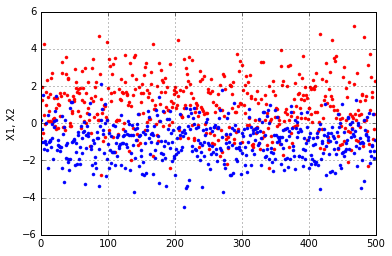

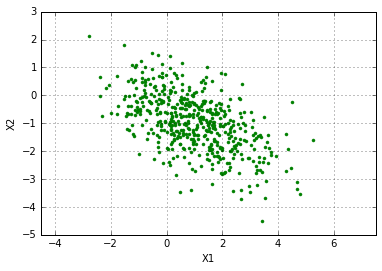

In [3]:
m = 500                    # pocet vzoriek
s = np.zeros((m,2))        # vytvorenie prazdneho pola
for i in range(m):        
    s[i] = X.rvs()         # vygenerovanie vzoriek

X1 = s[:,0]                # vyber poloziek vektora
X2 = s[:,1]

plt.plot(X1, 'r.')         # zobrazenie postupnosti vzoriek
plt.plot(X2, 'b.')
plt.ylabel('X1, X2')
plt.grid()
plt.show()

plt.plot(X1, X2,'g.')      # zobrazenie vzajomnej zavislosti X1,X2
plt.axis('equal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

Zobrazenie rozdelovacej funkcie

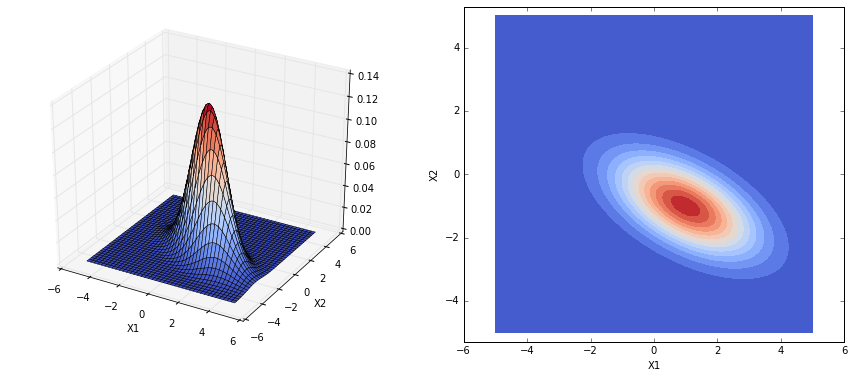

In [4]:
                                             # vykreslenie grafov
xd, yd = np.mgrid[-5:5.01:.01, -5:5.01:.01]  # vytvorenie mriezky YX suradnic pre 3D zobrazenie
pos = np.empty(xd.shape + (2,))
pos[:, :, 0] = xd
pos[:, :, 1] = yd


fig = plt.figure(figsize=(15, 6))             # rozmer obrazku
ax = fig.add_subplot(121, projection='3d')    # 3D zobrazenie pdf 
ax.plot_surface(xd, yd, X.pdf(pos), rstride=25, cstride=25, 
                linewidth=.5, antialiased=True, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(122)                               # 2D zobrazenie elipsy kovariancie
plt.contourf(xd, yd, X.pdf(pos), cmap=plt.cm.coolwarm, linewidth=.5, 
             levels=np.arange(0., 0.15, 0.01) )
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

### Literature

http://mathworld.wolfram.com/BivariateNormalDistribution.html